# 0. Описание задачи.

Задача - проанализаровать набор данных, а именно фильмы и сериалы Netflix, и решить задачу классификации.
На основе обучающей и тестовой выборки исследовать количество кассовых сборов фильмов и сериалов.

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# 1. Чтение данных.


In [2]:
url = "https://raw.githubusercontent.com/Sermjazhko/ML_SEA/master/netflix-rotten-tomatoes-metacritic-imdb.csv"
data_raw = pd.read_csv(url)

В таблице представлено более 15 тысяч фильмов и сериалов от Netflix. Для каждого фильма/сериала указаны: 

название фильма, жанры, язык оригинала, теги для поиска, фильм это или сериал, оценки и рейтинг, доступность в странах, длительность, режиссер, сценарист, актеры, возрастной рейтинг, средний балл по отзывам на IMDb, средний балл по отзывам на Rotten Tomatoes, средний балл по отзывам на Metacritic, количество полученных наград,  количество номинаций на награды, общие сборы, дата выхода, дата выхода на Netflix, продюсерская компания, количество отзывов на IMDb.

In [3]:
data_raw.shape

(15480, 29)

То есть 15480 различных фильмов и сериалов и 29 признаков.

Для примера первые пять строк данных: 

In [4]:
data_raw.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [5]:
data_raw["Boxoffice"] = data_raw["Boxoffice"].apply(lambda l: float(str(l).replace(",", "").replace("$", "")))

# 2. Визуализация данных. 

Все признаки фильмов: 

In [6]:
data_raw.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

Сводная информация для признаков. В нашей задаче в качестве количественных признаков выступают оценки на различных платформах, количество полученных наград и номинаций, количество голосов. 
Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей:

In [7]:
data_raw.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,4.007000e+03,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.568229e+07,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,7.097634e+07,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,7.200000e+01,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,7.816345e+05,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,1.955107e+07,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,5.969536e+07,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,6.593639e+08,2.354197e+06


В целом фильмы и сериалы от Netflix имеют оценку (рейтинг) выше среднего. Т.е. по 10-балльной шкале средняя оценка около 5.9-6.5 на разных платформах. По 100-балльной около 56-59. Есть фильмы как с высоким рейтингом и количеством наград, так и с совсем низкими оценками. 

Для удобства добавим столбец, определяющий кассовые сборы. Среднее значение кассовых сборов ~45.000.000, следовательно, за 1 обозначим фильмы и сериалы, преодолевшие средние сборы, 0 - иначе. 

In [8]:
data_raw["boolBoxoffice"] = np.where(data_raw["Boxoffice"] >= 45000000, 1, 0) 

Построим диаграмму рассеивания: зависимость отзывов на фильм/сериал от оценки фильма. 

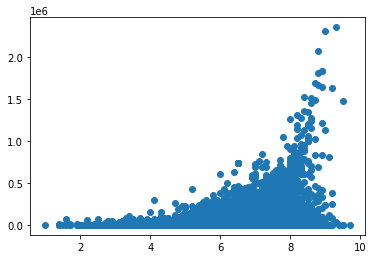

In [9]:
plt.scatter(data_raw['IMDb Score'], data_raw['IMDb Votes'])
pass

Видно, что чем выше оценка того или иного фильма, тем больше отзывов. Похоже на экспоненциальную зависимость.


Построим зависимость кассовых сборов от оценки фильма на платформе Rotten Tomatoes: 

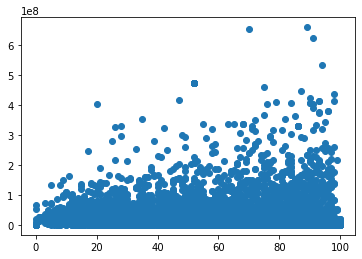

In [10]:
plt.scatter(data_raw['Rotten Tomatoes Score'], data_raw['Boxoffice'])
pass

Видно, что с ростом рейтинга фильма несколько возрастают и кассовые сборы. 

Также можно построить зависимость количества наград от рейтинга на одной из популярных платформ. Построим рандомно 1000 точек. 

In [11]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)

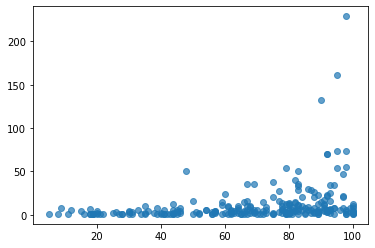

In [12]:

plt.scatter(data_raw.iloc[random_subset]['Rotten Tomatoes Score'], data_raw.iloc[random_subset]['Awards Received'],alpha=0.7)
pass

Вновь прослеживается зависимость: высокий рейтинг влечет за собой большее количество наград. 

Построим все возможные диаграммы рассеивания для каждой пары переменных:

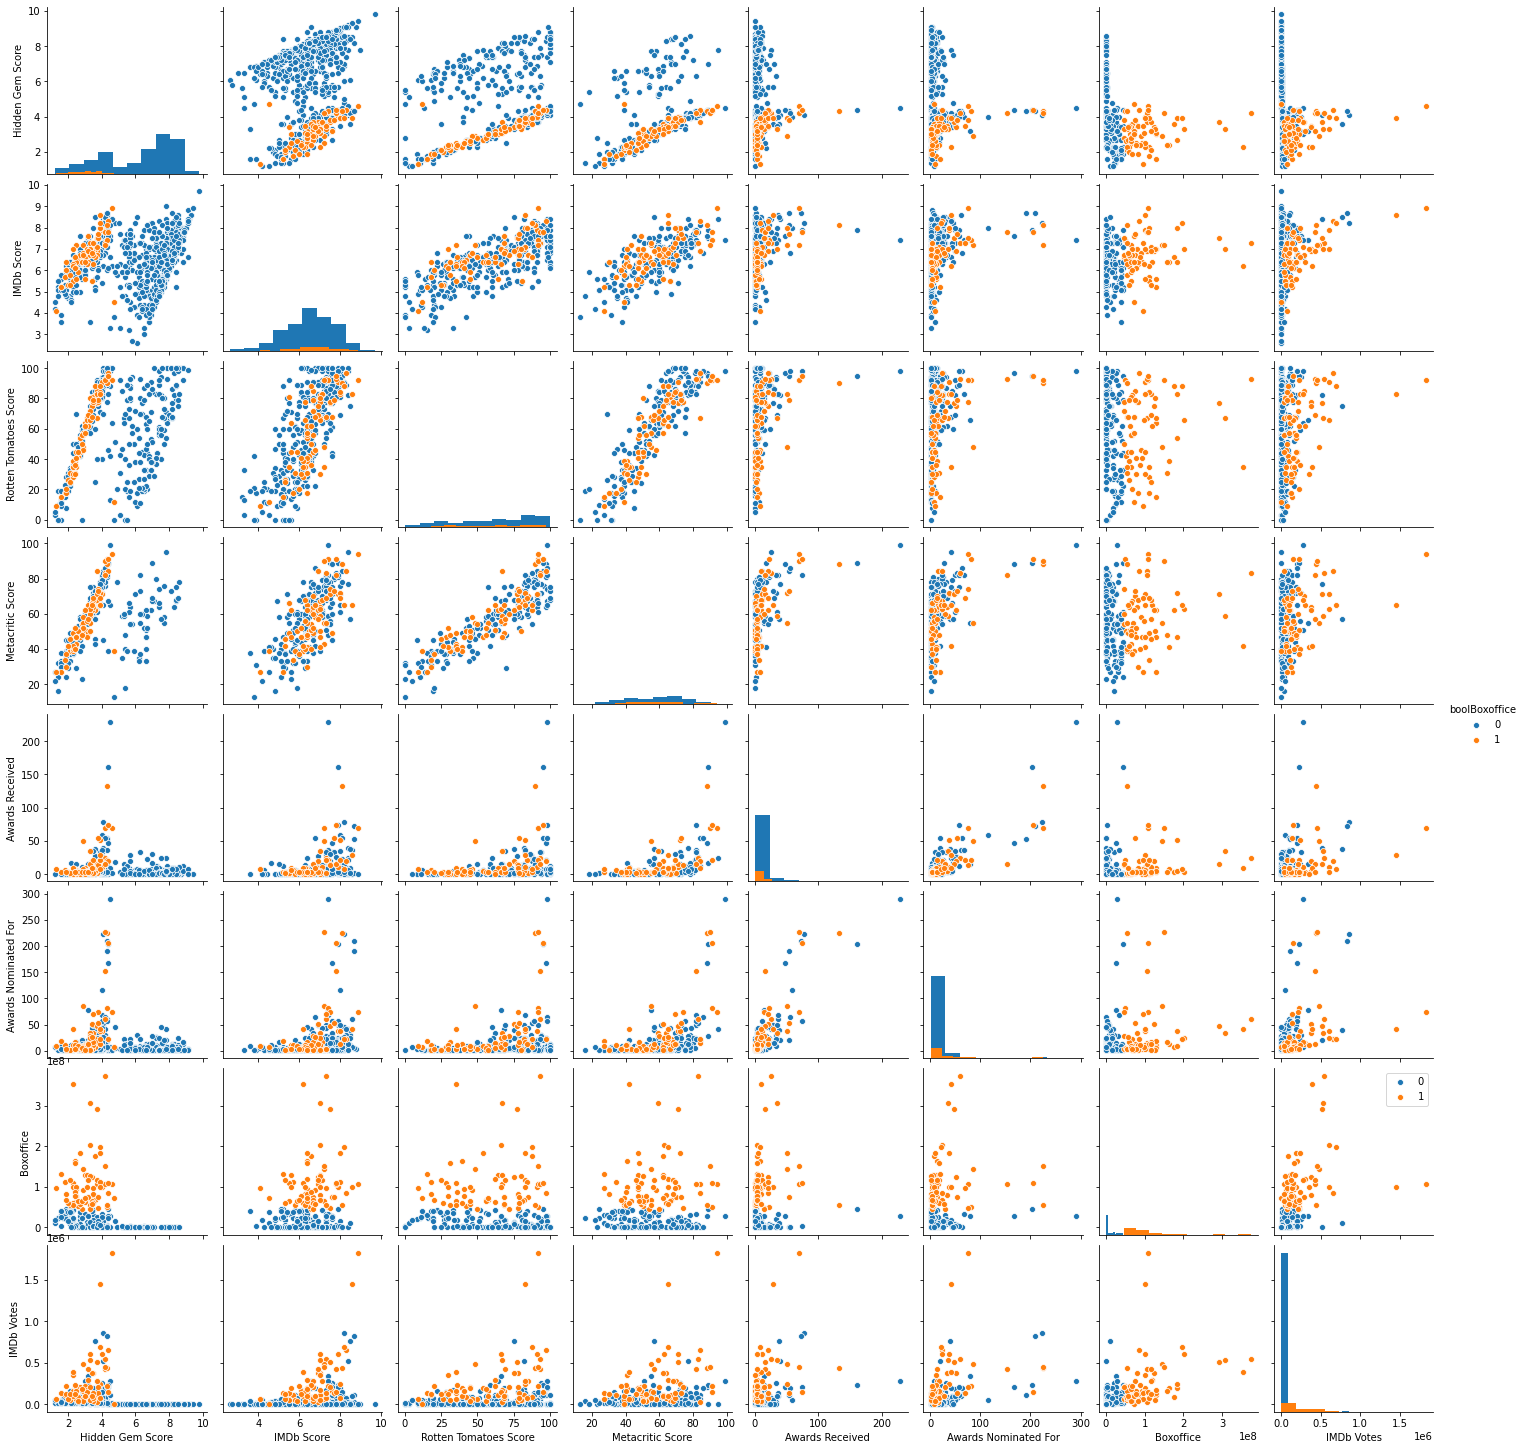

In [13]:
sns.pairplot(data_raw.iloc[random_subset], hue='boolBoxoffice', diag_kind='hist')
plt.legend()
pass

Из диаграмм наблюдается корреляция оценок на различных платформах. 

Отдельно построим гистограмму рейтинга на платформе Rotten Tomatoes:

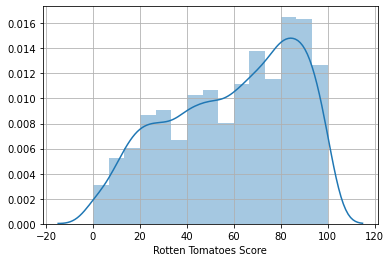

In [14]:
sns.distplot(data_raw['Rotten Tomatoes Score'], bins=15)
plt.grid()
pass

Построим корреляционную матрицу:

In [15]:
corr_mat = data_raw.corr()
corr_mat

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,boolBoxoffice
Hidden Gem Score,1.000000,0.120373,0.397905,0.521470,-0.112787,-0.159500,-0.211815,-0.359540,-0.414361
IMDb Score,0.120373,1.000000,0.710922,0.717715,0.291142,0.289843,0.138257,0.229760,0.060333
Rotten Tomatoes Score,0.397905,0.710922,1.000000,0.903345,0.301380,0.309572,0.053706,0.181762,0.011154
Metacritic Score,0.521470,0.717715,0.903345,1.000000,0.431420,0.449726,0.061548,0.261384,0.025752
Awards Received,-0.112787,0.291142,0.301380,0.431420,1.000000,0.817262,0.193976,0.469818,0.173673
Awards Nominated For,-0.159500,0.289843,0.309572,0.449726,0.817262,1.000000,0.284885,0.497690,0.227144
Boxoffice,-0.211815,0.138257,0.053706,0.061548,0.193976,0.284885,1.000000,0.630301,0.708275
IMDb Votes,-0.359540,0.229760,0.181762,0.261384,0.469818,0.497690,0.630301,1.000000,0.566771
boolBoxoffice,-0.414361,0.060333,0.011154,0.025752,0.173673,0.227144,0.708275,0.566771,1.000000


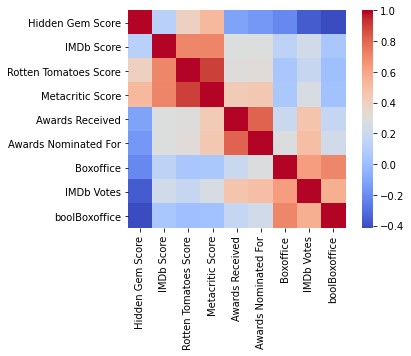

In [16]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Из матрицы корреляции видно, что  некоторые оценки на различных платформах коррелируют, то есть на различных платформах примерно один и тот же рейтинг фильма по мнению зрителей и критиков. Также коррелируют кассовые сборы и оценка кассовых сборов.

# 3. Обработка пропущенных значений


Пропущенные значения в таблице представлены значениями np.nan. Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [17]:
data_raw.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
boolBoxoffice                0
dtype: int64

В нашем случае пропущенных значений довольно много, чтобы их удалить. Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [18]:
data_raw['Genre'].fillna(data_raw['Genre'].mode().iloc[0], inplace=True)
data_raw['Tags'].fillna(data_raw['Tags'].mode().iloc[0], inplace=True)
data_raw['Languages'].fillna(data_raw['Languages'].mode().iloc[0], inplace=True)
data_raw['Country Availability'].fillna(data_raw['Country Availability'].mode().iloc[0], inplace=True)
data_raw['Runtime'].fillna(data_raw['Runtime'].mode().iloc[0], inplace=True)
data_raw['Director'].fillna(data_raw['Director'].mode().iloc[0], inplace=True)
data_raw['Writer'].fillna(data_raw['Writer'].mode().iloc[0], inplace=True)
data_raw['Actors'].fillna(data_raw['Actors'].mode().iloc[0], inplace=True)
data_raw['View Rating'].fillna(data_raw['View Rating'].mode().iloc[0], inplace=True)
data_raw['Release Date'].fillna(data_raw['Release Date'].mode().iloc[0], inplace=True)
data_raw['Production House'].fillna(data_raw['Production House'].mode().iloc[0], inplace=True)
data_raw['IMDb Link'].fillna(data_raw['IMDb Link'].mode().iloc[0], inplace=True)
data_raw['TMDb Trailer'].fillna(data_raw['TMDb Trailer'].mode().iloc[0], inplace=True)
data_raw['Trailer Site'].fillna(data_raw['Trailer Site'].mode().iloc[0], inplace=True)
data_raw['Poster'].fillna(data_raw['Poster'].mode().iloc[0], inplace=True)

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [19]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

Проверяем: 

In [20]:
data_raw.isna().sum()

Title                    0
Genre                    0
Tags                     0
Languages                0
Series or Movie          0
Hidden Gem Score         0
Country Availability     0
Runtime                  0
Director                 0
Writer                   0
Actors                   0
View Rating              0
IMDb Score               0
Rotten Tomatoes Score    0
Metacritic Score         0
Awards Received          0
Awards Nominated For     0
Boxoffice                0
Release Date             0
Netflix Release Date     0
Production House         0
Netflix Link             0
IMDb Link                0
Summary                  9
IMDb Votes               0
Image                    0
Poster                   0
TMDb Trailer             0
Trailer Site             0
boolBoxoffice            0
dtype: int64

# 4. Обработка категориальных признаков.

Создадим подтаблицу, избавившись от ненужных признаков: 

In [47]:
data = data_raw.loc[:, ['Title',  'Series or Movie',
       'Hidden Gem Score', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
        'Boxoffice', 'boolBoxoffice']].copy()

Столбец 'Series or Movie' содержит категориальные значения. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [48]:
data['Series or Movie'] = data['Series or Movie'].astype('category')

In [49]:
data.head()

,Title,Series or Movie,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,boolBoxoffice
0,Lets Fight Ghost,Series,4.3,7.9,98.0,82.0,74.0,2122065.0,0
1,HOW TO BUILD A GIRL,Movie,7.0,5.8,79.0,69.0,1.0,70632.0,0
2,Centigrade,Movie,6.4,4.3,64.0,46.0,3.0,16263.0,0
3,ANNE+,Series,7.7,6.5,64.0,57.0,1.0,19551067.0,0
4,Moxie,Movie,8.1,6.3,64.0,57.0,3.0,19551067.0,0


Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

In [50]:
data['Series or Movie'] = pd.factorize(data['Series or Movie'])[0]

В итоге получим: 

In [51]:
data.head()

,Title,Series or Movie,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,boolBoxoffice
0,Lets Fight Ghost,0,4.3,7.9,98.0,82.0,74.0,2122065.0,0
1,HOW TO BUILD A GIRL,1,7.0,5.8,79.0,69.0,1.0,70632.0,0
2,Centigrade,1,6.4,4.3,64.0,46.0,3.0,16263.0,0
3,ANNE+,0,7.7,6.5,64.0,57.0,1.0,19551067.0,0
4,Moxie,1,8.1,6.3,64.0,57.0,3.0,19551067.0,0


# 5. Нормализация

Стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.
Выполним стандартизацию всех признаков:

In [55]:
data.drop(['Title'], axis=1, inplace = True)

In [57]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data.describe()

,Series or Movie,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,boolBoxoffice
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,1.548000e+04,15480.000000
mean,0.755620,6.054606,6.510149,62.154264,56.947804,5.262209,2.631514e+07,0.083204
std,0.429733,2.112675,1.066909,17.474509,9.305129,11.810821,3.787825e+07,0.276199
min,0.000000,0.600000,1.000000,0.000000,5.000000,1.000000,7.200000e+01,0.000000
25%,1.000000,4.000000,6.000000,64.000000,57.000000,3.000000,1.955107e+07,0.000000
50%,1.000000,6.800000,6.600000,64.000000,57.000000,3.000000,1.955107e+07,0.000000
75%,1.000000,7.800000,7.200000,64.000000,57.000000,3.000000,1.955107e+07,0.000000
max,1.000000,9.800000,9.700000,100.000000,100.000000,300.000000,6.593639e+08,1.000000


# 6. Разбиваем данные на обучающую и тестовую выборки.

In [58]:
data_stand.columns

Index(['Series or Movie', 'Hidden Gem Score', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Boxoffice', 'boolBoxoffice'],
      dtype='object')

Для предсказания кассовых сборов будем использовать все входные признаки, кроме 'Boxoffice', 'boolBoxoffice'.

In [61]:
X = data_stand.drop(['IMDb Score',  'Boxoffice', 'boolBoxoffice'], axis=1)
y = data['boolBoxoffice']

In [62]:
X.head()

,Series or Movie,Hidden Gem Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
0,-1.758349,-0.830514,2.051316,2.692300,5.819900
1,0.568679,0.447487,0.964018,1.295221,-0.360873
2,0.568679,0.163487,0.105625,-1.176534,-0.191537
3,-1.758349,0.778820,0.105625,0.005609,-0.360873
4,0.568679,0.968153,0.105625,0.005609,-0.191537


### Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(11610, 3870)

# 7. Запустить классификатор ближайших соседей. Вычислить ошибки.

5 соседей

In [88]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))
print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.9409991386735572, Test: 0.9413436692506459. 
Error: Train : 0.05900086132644272, Test: 0.058656330749354 


10 соседей

In [98]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 10)
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.9291989664082687, Test: 0.9304909560723514. 
Error: Train : 0.07080103359173126, Test: 0.06950904392764858 


20 соседей

In [99]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 20)
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.9241171403962102, Test: 0.9253229974160206. 
Error: Train : 0.07588285960378983, Test: 0.07467700258397933 


30 соседей

In [100]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 30)
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.9223083548664944, Test: 0.9260981912144702. 
Error: Train : 0.0776916451335056, Test: 0.07390180878552971 


# 8. Сделать выводы

При малом количестве соседей точность на обучающей выборке выше, при увеличении количества соседей точность ухудшается, но это позволит улучшить точность на тестовой выборке.